In [1]:
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import csv

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [4]:
data_reformat = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/reformat_data.csv')
data_reformat

In [5]:
from sklearn import preprocessing
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data_reformat[LABEL] = le.fit_transform(data_reformat['class'].values.ravel())
dummy=data_reformat.groupby(['class'])
dummy.head(10)

,unique_id,user_id,x0,x1,x2,x3,x4,x5,x6,x7,...,zpeak,xabsoldev,yabsoldev,zabsoldev,xstandardev,ystandarddev,zstandarddev,resultant,class,ActivityEncoded
0,1,33,0.04,0.09,0.14,0.12,0.11,0.10,0.08,0.13,...,1550.00,3.29,7.21,4.00,4.05,8.17,4.05,11.96,Jogging,1
1,2,33,0.12,0.12,0.06,0.07,0.11,0.10,0.11,0.09,...,1233.33,4.23,6.88,4.05,5.43,8.19,5.43,12.05,Jogging,1
2,3,33,0.14,0.09,0.11,0.09,0.09,0.11,0.12,0.08,...,1780.00,4.18,6.89,4.07,5.55,8.19,5.55,11.99,Jogging,1
3,4,33,0.06,0.10,0.09,0.09,0.11,0.07,0.12,0.10,...,1380.00,2.26,4.13,2.49,2.87,4.95,2.87,10.69,Walking,5
4,5,33,0.12,0.11,0.10,0.08,0.10,0.14,0.10,0.11,...,1775.00,2.29,3.94,2.41,3.08,4.64,3.08,10.80,Walking,5
5,6,33,0.09,0.09,0.10,0.12,0.08,0.06,0.09,0.08,...,2675.00,2.00,3.39,1.94,3.13,4.95,3.13,8.63,Walking,5
6,7,33,0.12,0.12,0.12,0.13,0.15,0.11,0.08,0.09,...,1825.00,1.56,2.55,1.72,2.09,3.20,2.09,9.87,Upstairs,4
7,8,33,0.10,0.10,0.10,0.10,0.11,0.11,0.09,0.09,...,2983.33,1.84,2.69,1.41,2.22,3.35,2.22,9.91,Upstairs,4
8,9,33,0.08,0.07,0.08,0.08,0.05,0.08,0.14,0.10,...,1533.33,2.26,2.70,1.30,2.68,3.40,2.68,9.78,Upstairs,4
9,10,33,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,...,0.00,0.07,0.37,0.03,1.85,9.34,1.85,0.39,Upstairs,4


In [6]:
data_reformat.dtypes


unique_id            int64
user_id              int64
x0                 float64
x1                 float64
x2                 float64
x3                 float64
x4                 float64
x5                 float64
x6                 float64
x7                 float64
x8                 float64
x9                 float64
y0                 float64
y1                 float64
y2                 float64
y3                 float64
y4                 float64
y5                 float64
y6                 float64
y7                 float64
y8                 float64
y9                 float64
z0                 float64
z1                 float64
z2                 float64
z3                 float64
z4                 float64
z5                 float64
z6                 float64
z7                 float64
z8                 float64
z9                 float64
xavg                 int64
yavg               float64
zavg               float64
xpeak              float64
ypeak              float64
z

In [7]:
from numpy.random import seed
seed(1)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [9]:
y =data_reformat["ActivityEncoded"]
y.head(10)

0    1
1    1
2    1
3    5
4    5
5    5
6    4
7    4
8    4
9    4
Name: ActivityEncoded, dtype: int32

In [10]:
x = data_reformat[['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','y0','y1','y2','y3','y4','y5','y6','y7','y8','y9','z0','z1','z2','z3','z4','z5','z6','z7','z8','z9','xavg','yavg','zavg','xpeak','ypeak','zpeak','xabsoldev','yabsoldev','zabsoldev','xstandardev','ystandarddev','zstandarddev']]
#feature_names = x.columns
x.head()
x.dtypes

x0              float64
x1              float64
x2              float64
x3              float64
x4              float64
x5              float64
x6              float64
x7              float64
x8              float64
x9              float64
y0              float64
y1              float64
y2              float64
y3              float64
y4              float64
y5              float64
y6              float64
y7              float64
y8              float64
y9              float64
z0              float64
z1              float64
z2              float64
z3              float64
z4              float64
z5              float64
z6              float64
z7              float64
z8              float64
z9              float64
xavg              int64
yavg            float64
zavg            float64
xpeak           float64
ypeak           float64
zpeak           float64
xabsoldev       float64
yabsoldev       float64
zabsoldev       float64
xstandardev     float64
ystandarddev    float64
zstandarddev    

In [11]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=40)

In [12]:
y_train

5034    1
154     5
58      5
540     1
3536    0
       ..
3603    1
4722    1
3340    4
3064    4
3398    5
Name: ActivityEncoded, Length: 4063, dtype: int32

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [14]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_test_categorical

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
#59.78%
#model.add(Dense(units=6, activation='relu', input_dim=30))
#model.add(Dense(units=6, activation='softmax'))
#82.66%, with noise - (0.05- 83.76%, 83.1%, 0.2 - 84.2%, 81.9%),with dropout (0.5)-85 to 87%, with dropout (0.1,0.1) - 85.2%, (0.2,0.1) - 86-87%
model.add(Dense(units=60, activation='relu', input_dim=42))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=6, activation='softmax'))
#keras.layers.Dropout(0.05, noise_shape=None, seed=5)

#82.7%
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers.normalization import BatchNormalization
#model.add(Dense(units=60, use_bias=False, activation='relu', input_dim=42))
#model.add(BatchNormalization())
#model.add(Dense(units=100, activation='relu'))
##model.add(BatchNormalization())
#model.add(Dense(units=6, activation='softmax'))
##model.add(BatchNormalization())
#keras.layers.Dropout(0.05, noise_shape=None, seed=5)

#63.83 -- old experiment; tried again, not worth the effort
#model.add(Dense(units=120, activation='relu', input_dim=30))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=120, activation='relu'))
#model.add(Dense(units=6, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 60)                2580      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               6100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 606       
Total params: 9,286
Trainable params: 9,286
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#from keras.optimizers import SGD
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy',
#              optimizer=sgd,
#              metrics=['accuracy'])

In [22]:
# Fit the model to the training data
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
model.fit(X_train_scaled, y_train_categorical, epochs=300, class_weight=class_weights, verbose=2)

#model.fit(
#    X_train_scaled,
#    y_train_categorical,
#    epochs=200,
#    shuffle=True,
#    verbose=2
#)



Epoch 1/300
 - 3s - loss: 1.1713 - accuracy: 0.6188
Epoch 2/300
 - 0s - loss: 0.7874 - accuracy: 0.7194
Epoch 3/300
 - 0s - loss: 0.6936 - accuracy: 0.7421
Epoch 4/300
 - 0s - loss: 0.6284 - accuracy: 0.7637
Epoch 5/300
 - 0s - loss: 0.5924 - accuracy: 0.7768
Epoch 6/300
 - 0s - loss: 0.5647 - accuracy: 0.7854
Epoch 7/300
 - 0s - loss: 0.5413 - accuracy: 0.7923
Epoch 8/300
 - 0s - loss: 0.5210 - accuracy: 0.8009
Epoch 9/300
 - 0s - loss: 0.5115 - accuracy: 0.8024
Epoch 10/300
 - 0s - loss: 0.4921 - accuracy: 0.8080
Epoch 11/300
 - 0s - loss: 0.4765 - accuracy: 0.8189
Epoch 12/300
 - 0s - loss: 0.4724 - accuracy: 0.8184
Epoch 13/300
 - 0s - loss: 0.4519 - accuracy: 0.8235
Epoch 14/300
 - 0s - loss: 0.4534 - accuracy: 0.8221
Epoch 15/300
 - 0s - loss: 0.4463 - accuracy: 0.8272
Epoch 16/300
 - 0s - loss: 0.4310 - accuracy: 0.8312
Epoch 17/300
 - 0s - loss: 0.4224 - accuracy: 0.8334
Epoch 18/300
 - 0s - loss: 0.4172 - accuracy: 0.8346
Epoch 19/300
 - 0s - loss: 0.4118 - accuracy: 0.8405
Ep

Epoch 155/300
 - 0s - loss: 0.1386 - accuracy: 0.9503
Epoch 156/300
 - 0s - loss: 0.1315 - accuracy: 0.9525
Epoch 157/300
 - 0s - loss: 0.1425 - accuracy: 0.9461
Epoch 158/300
 - 0s - loss: 0.1402 - accuracy: 0.9481
Epoch 159/300
 - 0s - loss: 0.1288 - accuracy: 0.9473
Epoch 160/300
 - 0s - loss: 0.1394 - accuracy: 0.9468
Epoch 161/300
 - 0s - loss: 0.1368 - accuracy: 0.9493
Epoch 162/300
 - 0s - loss: 0.1343 - accuracy: 0.9491
Epoch 163/300
 - 0s - loss: 0.1346 - accuracy: 0.9532
Epoch 164/300
 - 0s - loss: 0.1323 - accuracy: 0.9520
Epoch 165/300
 - 0s - loss: 0.1240 - accuracy: 0.9545
Epoch 166/300
 - 0s - loss: 0.1341 - accuracy: 0.9535
Epoch 167/300
 - 0s - loss: 0.1353 - accuracy: 0.9532
Epoch 168/300
 - 0s - loss: 0.1183 - accuracy: 0.9582
Epoch 169/300
 - 0s - loss: 0.1388 - accuracy: 0.9510
Epoch 170/300
 - 0s - loss: 0.1285 - accuracy: 0.9542
Epoch 171/300
 - 0s - loss: 0.1263 - accuracy: 0.9572
Epoch 172/300
 - 0s - loss: 0.1236 - accuracy: 0.9552
Epoch 173/300
 - 0s - loss: 

In [23]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.4938596262263196, Accuracy: 0.8649446368217468


In [343]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

In [344]:
#other code to use label encoder

#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(data_reformat['class'].values)
#print(integer_encoded)



[1 1 1 ... 2 2 2]


In [24]:
model_loss_training, model_accuracy_training = model.evaluate(
    X_train_scaled, y_train_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss_training}, Accuracy: {model_accuracy_training}")

Normal Neural Network - Loss: 0.026464736286010718, Accuracy: 0.995323657989502


In [173]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(16, 14))
    plt.tight_layout()
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels= [1,2,3,4,5,6],
                yticklabels= [1,2,3,4,5,6],
                annot=True,
                square=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_test_scaled)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_categorical, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

ValueError: Error when checking input: expected lstm_19_input to have 3 dimensions, but got array with shape (1355, 42)

In [26]:
#X_test_scaled

In [179]:
# Grab just one data point to test with
test = np.expand_dims(X_test_scaled[100], axis=0)
result = np.expand_dims(y_test_categorical[100], axis=0)
test.shape
test
result

array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

In [180]:
# Make a prediction. The result should be 5 - STANDING
print(f"Predicted class: {model.predict_classes(test)}")

ValueError: Error when checking input: expected lstm_2_input to have 3 dimensions, but got array with shape (1, 42)

In [19]:
from keras.layers import Dense, Dropout , BatchNormalization

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#adding more layers to the model
model = Sequential()

model.add(Dense(units=60, activation='relu', input_dim=42))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=6, activation='softmax'))
#keras.layers.Dropout(0.05, noise_shape=None, seed=5)




In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                2580      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6100      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_3 (Dense)              (None, 196)               12740     
_________________________________________________________________
dense_4 (Dense)              (None, 196)               38612     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                6304      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 4063 samples
Epoch 1/100
4063/4063 - 3s - loss: 0.9758 - accuracy: 0.6567
Epoch 2/100
4063/4063 - 0s - loss: 0.6059 - accuracy: 0.7573
Epoch 3/100
4063/4063 - 0s - loss: 0.5199 - accuracy: 0.7923
Epoch 4/100
4063/4063 - 0s - loss: 0.4592 - accuracy: 0.8110
Epoch 5/100
4063/4063 - 0s - loss: 0.4148 - accuracy: 0.8317
Epoch 6/100
4063/4063 - 0s - loss: 0.4017 - accuracy: 0.8353
Epoch 7/100
4063/4063 - 0s - loss: 0.3664 - accuracy: 0.8536
Epoch 8/100
4063/4063 - 0s - loss: 0.3264 - accuracy: 0.8646
Epoch 9/100
4063/4063 - 0s - loss: 0.2966 - accuracy: 0.8814
Epoch 10/100
4063/4063 - 0s - loss: 0.2577 - accuracy: 0.8961
Epoch 11/100
4063/4063 - 0s - loss: 0.2564 - accuracy: 0.8932
Epoch 12/100
4063/4063 - 0s - loss: 0.2201 - accuracy: 0.9084
Epoch 13/100
4063/4063 - 0s - loss: 0.2064 - accuracy: 0.9195
Epoch 14/100
4063/4063 - 0s - loss: 0.2023 - accuracy: 0.9203
Epoch 15/100
4063/4063 - 0s - loss: 0.1988 - accuracy: 0.9225
Epoch 16/100
4063/4063 - 0s - loss: 0.1536 - accuracy: 0.

In [34]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1355/1 - 1s - loss: 1.2519 - accuracy: 0.8428
Normal Neural Network - Loss: 0.8624963840435352, Accuracy: 0.8428044319152832


In [36]:
#from keras.layers import Dense,LSTM,Dropout

#np.random.seed(7)
#model = Sequential()
#model.add(LSTM(24, input_dim =42,return_sequences=True))
#model.add(LSTM(12))
#model.add(Dense(6, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [38]:
#data = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1.csv')
#data

In [44]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# import numpy as np

# data_dim = 6
# timesteps = 100
# num_classes = 10
# batch_size = 32

# # Expected input batch shape: (batch_size, timesteps, data_dim)
# # Note that we have to provide the full batch_input_shape since the network is stateful.
# # the sample of index i in batch k is the follow-up for the sample i in batch k-1.
# model = Sequential()
# model.add(LSTM(32, return_sequences=True, stateful=True,
#                batch_input_shape=(batch_size, timesteps, data_dim)))
# model.add(LSTM(32, return_sequences=True, stateful=True))
# model.add(LSTM(32, stateful=True))
# model.add(Dense(6, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# # Generate dummy training data
# x_train = np.random.random((batch_size * 10, timesteps, data_dim))
# y_train = np.random.random((batch_size * 10, num_classes))

# # Generate dummy validation data
# x_val = np.random.random((batch_size * 3, timesteps, data_dim))
# y_val = np.random.random((batch_size * 3, num_classes))

# model.fit(x_train, y_train,
#           batch_size=batch_size, epochs=5, shuffle=False,
#           validation_data=(x_val, y_val))


In [179]:
data = pd.read_csv('WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1.csv')
data

,user_id,activity,timestamp,acc_x,acc_y,acc_z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1098204,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1098205,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1098206,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1098207,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


In [180]:
from sklearn import preprocessing
# Define column name of the label vector
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data[LABEL] = le.fit_transform(data['activity'].values.ravel())
# dummy=data_reformat.groupby(['class'])
# dummy.head(10)

data

dummy2=data.groupby(['activity'])
dummy2.head(10)

,user_id,activity,timestamp,acc_x,acc_y,acc_z,ActivityEncoded
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,1
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526,1
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926,1
7,33,Jogging,49106652389000,-0.503953,13.947236,7.055340,1
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871,1
9,33,Jogging,49106872299000,0.953424,1.375655,1.648062,1


In [181]:
data_train = data[data['user_id'] <=28]
data_test =  data[data['user_id'] > 28]
x_train = data_train[['acc_x','acc_y','acc_z']]
x_test = data_test[['acc_x','acc_y','acc_z']]
y_train = data_train[['ActivityEncoded']]
y_test = data_test[['ActivityEncoded']]
y_train

,ActivityEncoded
8489,5
8490,5
8491,5
8492,5
8493,5
...,...
1098204,2
1098205,2
1098206,2
1098207,2


In [147]:
#data_train_filter = data_train[['user_id','acc_x','acc_y','acc_z','ActivityEncoded']]
#data_train_filter = data_train[['acc_x','acc_y','acc_z','ActivityEncoded']]
#data_train_filter

In [148]:
#data_train_filter

In [192]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

x_training_scaled = scaler.fit_transform(x_train)
x_training_scaled

array([[0.51016316, 0.74190794, 0.48893191],
       [0.49570273, 0.75152636, 0.48789509],
       [0.4898497 , 0.74293849, 0.48478463],
       ...,
       [0.7252275 , 0.45977301, 0.54529307],
       [0.72320526, 0.45775536, 0.54630804],
       [0.72017189, 0.46103405, 0.54326313]])

In [219]:
features_set = []
labels = []
x_training_scaled[0:200]
x_training_scaled[0:200,0]
x_training_scaled[2,1]
#x_train["acc_x"].values[0:200]
#y_train["ActivityEncoded"].values[0]
for i in range(0, 834600, 200):
    features_set.append([x_training_scaled[i:i+200, 0],x_training_scaled[i:i+200, 1],x_training_scaled[i:i+200, 2]])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 0])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 1])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 2])
    max_labels_perwindow = stats.mode(y_train["ActivityEncoded"][i: i+200])[0][0]
    labels.append(max_labels_perwindow)

len(labels)
len(features_set)
labels = to_categorical(labels)
#len(labels)
#labels

In [220]:
features_set, labels = np.array(features_set), np.array(labels)
features_set.shape

(4173, 3, 200)

In [221]:
# # features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
#features_set.shape[0]
#features_set.shape[1]
#features_set = np.reshape(features_set, (4173,600,1))
features_set = np.reshape(features_set, (4173,200,3))
#features_set = np.reshape(features_set, (features_set.shape[0], 240))
features_set.shape

(4173, 200, 3)

In [222]:
features_set

array([[[0.51016316, 0.49570273, 0.4898497 ],
        [0.49948999, 0.49948999, 0.51119605],
        [0.4984571 , 0.49294836, 0.49363695],
        ...,
        [0.52176451, 0.43916459, 0.49480721],
        [0.47718129, 0.41013365, 0.51312435],
        [0.48962312, 0.59088579, 0.64134433]],

       [[0.48227519, 0.56731629, 0.58659686],
        [0.6255023 , 0.64788154, 0.49363695],
        [0.58384249, 0.52186922, 0.58384249],
        ...,
        [0.49860889, 0.46750431, 0.50033692],
        [0.47337962, 0.40045667, 0.48478463],
        [0.50033692, 0.67452253, 0.50517541]],

       [[0.56249615, 0.50258865, 0.58005523],
        [0.65752183, 0.56043037, 0.56731629],
        [0.57041495, 0.51016316, 0.62068215],
        ...,
        [0.45298884, 0.50621223, 0.47130598],
        [0.58708412, 0.65033009, 0.4021847 ],
        [0.43259806, 0.46266582, 0.47337962]],

       ...,

       [[0.72320526, 0.72320526, 0.72219414],
        [0.72219414, 0.72219414, 0.72118301],
        [0.72118301, 0

In [223]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [224]:
model = Sequential()

In [225]:
#model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
#model.add(LSTM(units=50, return_sequences=True, input_shape=(600, 1)))
# model.add(LSTM(units=36, return_sequences=True, input_shape=(200, 3)))
model.add(LSTM(units=36,input_shape=(200, 3)))

In [226]:
#model.add(Dropout(0.2))

In [227]:
#model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))
model.add(Dropout(0.1))
# model.add(LSTM(units=18))
#model.add(Dropout(0.2))

In [228]:
model.add(Dense(6, activation='sigmoid'))
model.summary()
# model.add(Dense(units = 6))
# model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 36)                5760      
_________________________________________________________________
dropout_24 (Dropout)         (None, 36)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 222       
Total params: 5,982
Trainable params: 5,982
Non-trainable params: 0
_________________________________________________________________


In [229]:
# model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [230]:
model.fit(features_set, labels, epochs = 30, batch_size = 16, verbose = 2)

Epoch 1/30
 - 26s - loss: 1.4856 - accuracy: 0.3896
Epoch 2/30
 - 25s - loss: 1.4269 - accuracy: 0.3988
Epoch 3/30
 - 27s - loss: 1.3789 - accuracy: 0.4256
Epoch 4/30
 - 25s - loss: 1.3478 - accuracy: 0.4294
Epoch 5/30
 - 26s - loss: 1.3440 - accuracy: 0.4603
Epoch 6/30
 - 26s - loss: 1.3407 - accuracy: 0.4800
Epoch 7/30
 - 25s - loss: 1.2892 - accuracy: 0.5143
Epoch 8/30
 - 25s - loss: 1.2962 - accuracy: 0.5008
Epoch 9/30
 - 25s - loss: 1.2457 - accuracy: 0.5363
Epoch 10/30
 - 25s - loss: 1.4163 - accuracy: 0.4436
Epoch 11/30
 - 25s - loss: 1.3672 - accuracy: 0.4584
Epoch 12/30
 - 24s - loss: 1.2097 - accuracy: 0.5624
Epoch 13/30
 - 25s - loss: 1.2844 - accuracy: 0.5011
Epoch 14/30
 - 25s - loss: 1.2675 - accuracy: 0.5361
Epoch 15/30
 - 25s - loss: 1.2956 - accuracy: 0.5066
Epoch 16/30
 - 24s - loss: 1.1754 - accuracy: 0.5852
Epoch 17/30
 - 24s - loss: 1.2628 - accuracy: 0.5253
Epoch 18/30
 - 24s - loss: 1.1942 - accuracy: 0.5629
Epoch 19/30
 - 24s - loss: 1.1408 - accuracy: 0.5984
Ep

In [237]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(36,return_sequences=True,input_shape=(200, 3)))
# Adding a dropout layer
model.add(Dropout(0.1))

model.add(LSTM(units=18))
# Adding a dropout layer
model.add(Dropout(0.1))
# Adding a dense output layer with sigmoid activation
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 200, 36)           5760      
_________________________________________________________________
dropout_25 (Dropout)         (None, 200, 36)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 18)                3960      
_________________________________________________________________
dropout_26 (Dropout)         (None, 18)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 114       
Total params: 9,834
Trainable params: 9,834
Non-trainable params: 0
_________________________________________________________________


In [238]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [239]:
model.fit(features_set, labels, epochs = 30, batch_size = 16, verbose = 2)

Epoch 1/30
 - 48s - loss: 1.4918 - accuracy: 0.3892
Epoch 2/30
 - 49s - loss: 1.4224 - accuracy: 0.4012
Epoch 3/30
 - 47s - loss: 1.4006 - accuracy: 0.4162
Epoch 4/30
 - 47s - loss: 1.3699 - accuracy: 0.4289
Epoch 5/30
 - 47s - loss: 1.3734 - accuracy: 0.4234
Epoch 6/30
 - 46s - loss: 1.3490 - accuracy: 0.4292
Epoch 7/30
 - 46s - loss: 1.3371 - accuracy: 0.4294
Epoch 8/30
 - 46s - loss: 1.3245 - accuracy: 0.4359
Epoch 9/30
 - 46s - loss: 1.3004 - accuracy: 0.4484
Epoch 10/30
 - 49s - loss: 1.2883 - accuracy: 0.4970
Epoch 11/30
 - 52s - loss: 1.2567 - accuracy: 0.5325
Epoch 12/30
 - 54s - loss: 1.2055 - accuracy: 0.5588
Epoch 13/30
 - 53s - loss: 1.1820 - accuracy: 0.5799
Epoch 14/30
 - 52s - loss: 1.1513 - accuracy: 0.5977
Epoch 15/30
 - 52s - loss: 1.1101 - accuracy: 0.6175
Epoch 16/30
 - 53s - loss: 1.0849 - accuracy: 0.6341
Epoch 17/30
 - 53s - loss: 1.0817 - accuracy: 0.6322
Epoch 18/30
 - 53s - loss: 1.0291 - accuracy: 0.6530
Epoch 19/30
 - 52s - loss: 1.0275 - accuracy: 0.6585
Ep

In [240]:
x_test

,acc_x,acc_y,acc_z
0,-0.694638,12.680544,0.503953
1,5.012288,11.264028,0.953424
2,4.903325,10.882658,-0.081722
3,-0.612916,18.496431,3.023717
4,-1.184970,12.108489,7.205164
...,...,...,...
832897,8.200000,4.520000,0.150000
832898,8.960000,4.020000,1.460000
832899,7.970000,4.750000,0.610000
832900,8.010000,4.790000,0.690000


In [241]:
y_test

,ActivityEncoded
0,1
1,1
2,1
3,1
4,1
...,...
832897,3
832898,3
832899,3
832900,3


In [242]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

x_testing_scaled = scaler.fit_transform(x_test)
x_testing_scaled
len(x_testing_scaled)

263424

In [243]:
features_set_2 = []
labels_2 = []
#x_testing_scaled[0:200]
#x_testing_scaled[0:200,0]
#x_testing_scaled[2,1]
#x_train["acc_x"].values[0:200]
#y_train["ActivityEncoded"].values[0]
for i in range(0, 263400, 200):
    features_set_2.append([x_testing_scaled[i:i+200, 0],x_testing_scaled[i:i+200, 1],x_testing_scaled[i:i+200, 2]])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 0])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 1])
    #for j in range(0, 200, 1):
    #    features_set.append(x_training_scaled[(i+j), 2])
    max_labels_perwindow = stats.mode(y_test["ActivityEncoded"][i: i+200])[0][0]
    labels_2.append(max_labels_perwindow)

len(features_set_2)
labels_2 = to_categorical(labels_2)
len(labels_2)
len(features_set_2)

1317

In [244]:
features_set_2, labels_2 = np.array(features_set_2), np.array(labels_2)
#test_features_2 = np.array(features_set_2)
# test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
# Making Predictions

features_set_2.shape

(1317, 3, 200)

In [245]:
features_set_2= np.reshape(features_set_2,(1317,200,3))
features_set_2.shape

(1317, 200, 3)

In [246]:
model_loss, model_accuracy = model.evaluate(
    features_set_2, labels_2, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 1.2356204040682306, Accuracy: 0.5998481512069702


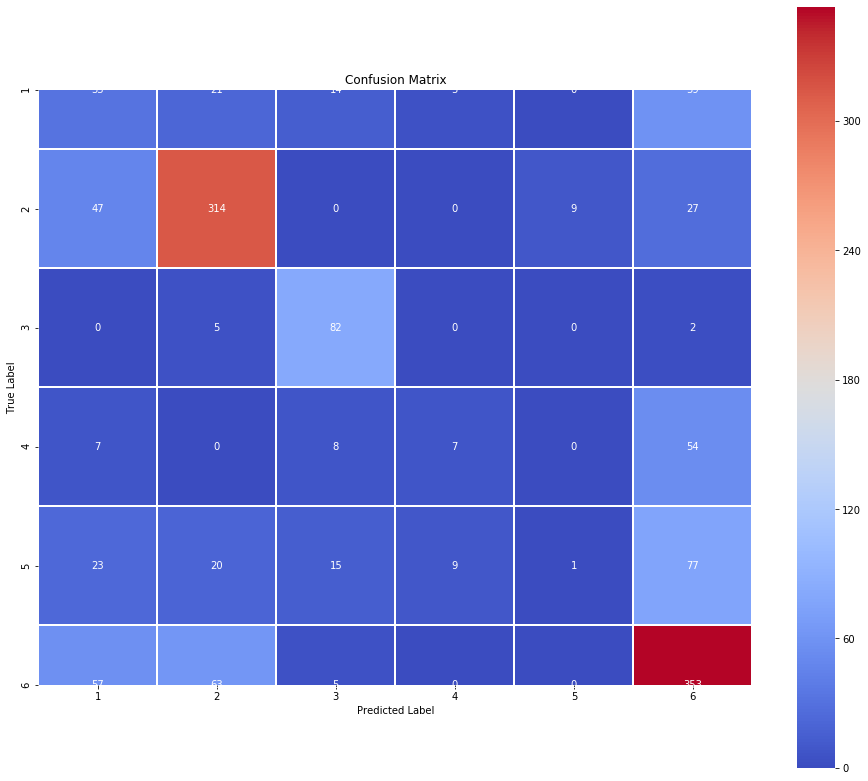

              precision    recall  f1-score   support

           0       0.20      0.25      0.22       132
           1       0.74      0.79      0.77       397
           2       0.66      0.92      0.77        89
           3       0.33      0.09      0.14        76
           4       0.10      0.01      0.01       145
           5       0.62      0.74      0.67       478

    accuracy                           0.60      1317
   macro avg       0.44      0.47      0.43      1317
weighted avg       0.54      0.60      0.56      1317



array([[5.3914654e-01, 5.1790744e-02, 8.4314644e-03, 7.0330679e-02,
        4.9258369e-01, 1.8669820e-01],
       [1.2378928e-01, 2.2894025e-02, 4.7239661e-03, 2.1086335e-03,
        1.0316917e-01, 4.6477556e-02],
       [5.8560771e-01, 4.5514107e-02, 2.6317149e-02, 1.1424026e-01,
        5.1806003e-01, 1.1996475e-01],
       ...,
       [9.5556766e-02, 1.8322796e-02, 4.8887730e-04, 2.0384789e-02,
        1.1859828e-01, 7.5786674e-01],
       [1.1843583e-01, 1.8299311e-02, 1.0354817e-03, 3.5903901e-02,
        1.4763725e-01, 8.3099222e-01],
       [7.7690713e-02, 4.2829856e-02, 1.3249982e-04, 8.8800006e-03,
        1.0802234e-01, 6.7654061e-01]], dtype=float32)

In [247]:
labels_pred_test = model.predict(features_set_2)
labels_pred_test
# Take the class with the highest probability from the test predictions
max_labels_pred_test = np.argmax(labels_pred_test, axis=1)
max_labels_test = np.argmax(labels_2, axis=1)

show_confusion_matrix(max_labels_test, max_labels_pred_test)

print(classification_report(max_labels_test, max_labels_pred_test))
labels_pred_test
